In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

class OnlineData:

    def __init__(self, filename):
        self.filename = filename
        self.f = open(filename, 'r')
        self.TotalQ = 1
        self.Qnow = np.array([0])
        self.Pnow = np.array([0])
 
    def __next__(self):
        line = next(self.f)[:-1]
        if len(line) < 1:
            return None
        Q_, P_ = np.array([z[1:-1].split(",") for z in line.split("\t")
                          ]).astype(float).astype(int).T
        self.Qnow = Q_
        self.Pnow = P_
        CS = np.cumsum(P_ * np.ediff1d(Q_, to_begin=Q_[0]))

        self.TotalQ = sum(Q_)

        def F(Q):
            if Q <= Q_[0]:
                return P_[0] * Q
            if Q > sum(Q_):
                return None
            i = np.searchsorted(Q_, Q)
            return CS[i - 1] + (Q - Q_[i - 1]) * P_[i]

        self.F = F
        return self.F

    def __iter__(self):
        return self

    def close(self):
        self.f.close()

In [20]:
def deltaV(P1: np.array, P2: np.array, Q1: np.array, Q2: np.array):
    volume = 0
    total_price = 0

    for i in range(len(Q2)):
        if Q2[i] == 0:
            for j in range(len(Q1)):
                if P1[j] == P2[i]:
                    volume += Q1[j]
                    total_price += Q1[j] * P1[j]
                    break
        else:
            for j in range(len(Q1)):
                if P1[j] == P2[i]:
                    volume += abs(Q1[j] - Q2[j])
                    total_price += (abs(Q1[j] - Q2[j])) * P2[j]
                    break
            break
    
    return volume, total_price
    

In [21]:
def MIdQ(bidfilename: str,
               dQfilename: str,
               depth: int):
    
    it1 = OnlineData(bidfilename)
    it2 = OnlineData(bidfilename)

    fPrice2 = next(it2)
    fPrice1 = next(it1)
    fPrice2 = next(it2)

    dQ = open(dQfilename, 'w+')
    dQ.write("Time," + "PriceChange," + "Loses," + "volume\n")


    for i in range(depth):
        if(i > 100):
            if it2.Qnow[0] == 0:
                # tildS = Price1(volume) / volume
                flag = 1

                Price2 = it2.Pnow[0]
                Price1 = it1.Pnow[0]
                volume = 0
                total_price = 0
                P1 = it1.Pnow
                Q1 = it1.Qnow
                P2 = it2.Pnow
                Q2 = it2.Qnow

                
                volume, total_price = deltaV(P1, P2, Q1, Q2)

                # print(i)
                # print(volume, total_price)
                # print(*zip(P1, Q1))
                # print(*zip(P2, Q2))

                if(volume > 0 and flag):
                    dQ.write(str(i) + ", " 
                        + str(((Price2 - Price1)/Price1 * 10000)) + ", " 
                         + str((total_price - volume * Price1) / volume) + ", " 
                        + str(volume / 142266100 * 10000) + "\n")
                
        
        fPrice1 = next(it1)
        fPrice2 = next(it2)
        
    dQ.close()

In [22]:
MIdQ("DataForImpact/bid_22_10_03.tsv", "DataForImpact/BIGdQI_10bp.csv", 10000)

471
98000 2284919000
(23315, 49000) (23316, 54000) (23339, 104000) (23360, 105000) (23380, 605000) (23444, 1605000) (23600, 1608000) (23615, 1658000) (23629, 1662000) (23630, 1663000) (23776, 1763000) (23832, 1770000) (23940, 1772000) (24000, 1774000) (24156, 1824000) (24180, 1836000) (24400, 1839000) (24496, 1889000) (24744, 1939000) (24960, 1949000) (25245, 1954000)
(23315, 0) (23316, 5000) (23339, 55000) (23360, 56000) (23380, 556000) (23444, 1556000) (23600, 1559000) (23615, 1609000) (23629, 1613000) (23630, 1614000) (23776, 1714000) (23832, 1721000) (23940, 1723000) (24000, 1725000) (24156, 1775000) (24180, 1787000) (24400, 1790000) (24496, 1840000) (24744, 1890000) (24960, 1900000) (25245, 1905000)
574
100000 2331550000
(23315, 50000) (23316, 55000) (23339, 105000) (23360, 106000) (23380, 606000) (23444, 1606000) (23600, 1609000) (23615, 1659000) (23629, 1663000) (23630, 1664000) (23776, 1764000) (23832, 1771000) (23940, 1773000) (23960, 1774000) (24000, 1776000) (24156, 1826000)

In [84]:
import pandas as pd
df = pd.read_csv("DataForImpact/dQI.csv")

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': ' Impact'}>],
       [<Axes: title={'center': ' DeltaQ'}>, <Axes: >]], dtype=object)

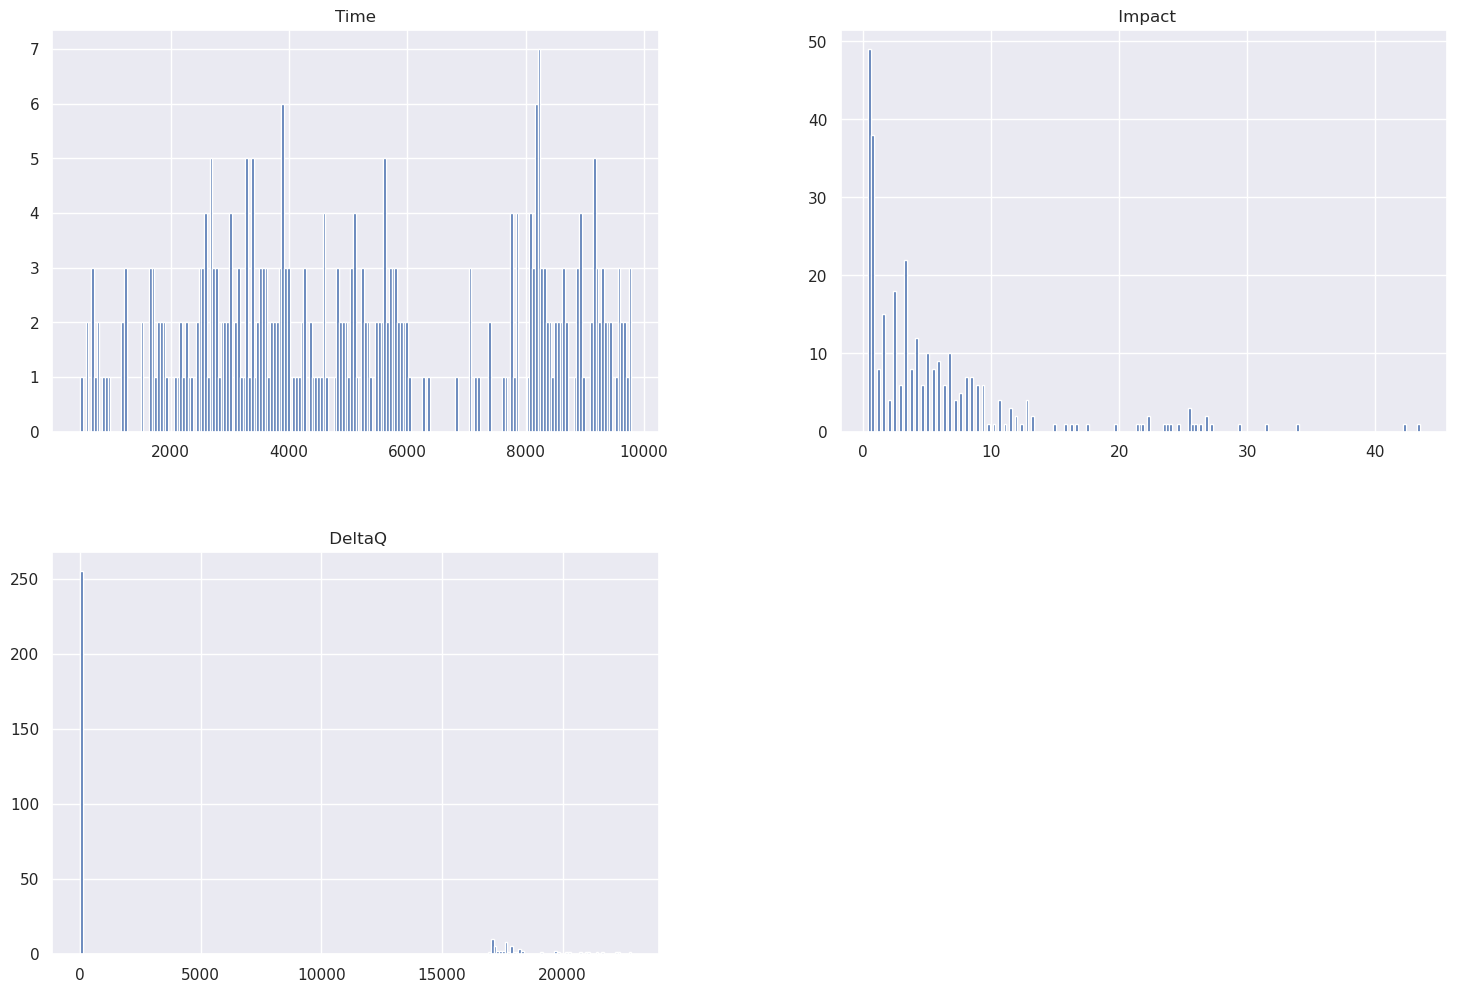

In [86]:
df.iloc[:, :].hist(figsize=(18, 12), bins=200)